In [ ]:
import tensorflow as tf
from tensorflow import keras
print("TF version:", tf.__version__)
import itertools
import os
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from numpy import expand_dims
import pandas as pd
from skimage import io
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
import pickle

TF version: 2.6.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.6.0
Hub version: 0.12.0
GPU is NOT AVAILABLE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#De-Pickling Data with encoding latin1
with open("/content/drive/MyDrive/Gdrive/set_1.pkl", 'rb') as f:
    Xd = pickle.load(f, encoding='latin1')

In [ ]:
!unzip /content/drive/MyDrive/Gdrive/Image_captioning_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Flicker8k_Dataset/._342872408_04a2832a1b.jpg  
  inflating: Flicker8k_Dataset/3429142249_d09a32e291.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429142249_d09a32e291.jpg  
  inflating: Flicker8k_Dataset/3429194423_98e911a101.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429194423_98e911a101.jpg  
  inflating: Flicker8k_Dataset/3429351222_17ae744daf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351222_17ae744daf.jpg  
  inflating: Flicker8k_Dataset/3429351964_531de1bf16.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351964_531de1bf16.jpg  
  inflating: Flicker8k_Dataset/3429391520_930b153f94.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429391520_930b153f94.jpg  
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._34295

In [ ]:
lst = os.listdir('/content/Flicker8k_Dataset/')

In [ ]:
filen = []
caption = []
imgn = []
capno = []

In [ ]:
for j in range(len(Xd)):
  file, cap = Xd[j].split('\t')
  filen.append(file)
  caption.append(cap)
  im, capn = filen[j].split('#')
  imgn.append(im)
  capno.append(capn)


In [ ]:
max(capno)

'4'

In [ ]:
#fist try without using indx function i.e. we can use filen list to find all caption of an image
  #we need to plot this pic with all its caption
  #take any two pic with their caption
def indx(list1,picname):
  indc  = []
  for c in range(5):
    k = str(c)
    namei = picname +"#"+ k
    try :
      indc.append(list1.index(namei))
    except :
      c = c+1 # some captions are not present so caption no. will not be same as index of indx list but it can be accessed from capno list
  return indc

  #here i tried to use only filen list , i will not use imgn further

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


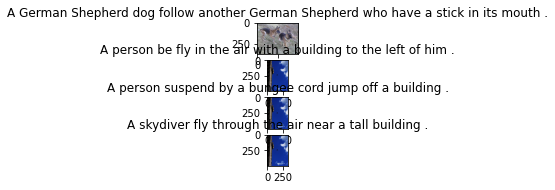

In [ ]:
#print image with caption
folder = '/content/Flicker8k_Dataset/'
for l in range(2): 
  pic = lst[l]
  picid = indx(filen,lst[l])
  for cid in range(len(picid)):
    plt.subplot(611+l+cid)
    plt.title(caption[picid[cid]])
    filename = folder +  pic
    image = imread(filename)
    plt.imshow(image)


In [ ]:
print(indx(filen,'2089122314_40d5739aef.jpg'))

[9257, 10476, 0]


In [ ]:
filen[9257]

'2089122314_40d5739aef.jpg#0'

In [ ]:
10476..2
0....3
9257...0


SyntaxError: ignored

In [ ]:
filen[:5]

['2089122314_40d5739aef.jpg#3',
 '1295671216_cde1b9c9d1.jpg#0',
 '3183195185_cd0ff994a1.jpg#4',
 '2949353587_64c54e9589.jpg#1',
 '361092202_3d70144ebd.jpg#2']

In [ ]:
#function for index of element
def indx(b,element):
  index = []
  for i in range(len(b)):
    if element == b[i]:
      index.append(i)
  return index

In [ ]:
for j in range(len(Xd)):
  imgn , capn = list(), list()
   = Xd[j].split('\t')
  capn = Xd[j].split('#')


IndentationError: ignored

In [ ]:
filen , caption = map(lambda i: list(map(lambda j: Xd[j].split('\t'), range(len(Xd)))), [0,1])
imgn , capno = map(lambda i: list(map(lambda j: filen[j].split('#'), range(len(Xd)))), [0,1])

AttributeError: ignored

In [ ]:
capno[:15]

['3', '0', '4', '1', '2', '1', '1', '3', '2', '2', '0', '4', '3', '0', '3']

In [ ]:
caption[0]

'A fluffy , tri-colored dog be run down a road with a paper in its mouth .'

In [ ]:
type(capno)

list

In [ ]:
imgn[0]

'2089122314_40d5739aef.jpg'

In [ ]:
print(len(imgn),len(capno),len(caption))

25000 25000 25000


In [ ]:
a = [2,3,6,4,2,4,3,5]
a.index(2)

0

In [ ]:
bb = indx(a, 4)
print(bb)

[3, 5]


In [ ]:
with open("/content/drive/MyDrive/Gdrive/image_captioning_dataset.zip", 'rb') as f2:
    Xd2 = pickle.load(f2, encoding='latin1')

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

In [ ]:
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [ ]:
X.shape

(162060, 2, 128)

In [ ]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train0 = int(n_examples * 0.8)
train_idx0 = np.random.choice(range(0,n_examples), size=n_train0, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx0))
X_train = X[train_idx0]
X_test =  X[test_idx]

In [ ]:
print(lbl[103700:103718])

[('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6)]


In [ ]:
print(test_idx[:40],'\n',train_idx0[:40])
print(X_test[25,:,:])

[131073, 131075, 7, 8, 13, 131087, 17, 131090, 19, 20, 21, 131093, 131098, 27, 28, 31, 131103, 131105, 34, 131107, 36, 131109, 131111, 40, 131113, 43, 131115, 131117, 131120, 49, 131121, 54, 131129, 60, 63, 131135, 131138, 131139, 131142, 131144] 
 [102702 156120 128238 139272 125234 133840 149301  84244 144988  66645
  95309 123193 115761 121616  37452  71739  91967 108024 117598  71932
 123915  76325  79052  26382  40481 147422 121466 159566 130123 115033
  36024  15969 108344   4303  94160  91820  24342  85812 131970  86312]
[[ -71.619415    126.991135    112.520355     21.975126    -26.437279
    19.42881     -18.119387    -83.36401      11.617944    -65.48164
     2.8422666    34.80502      69.13712     -23.024456     25.439016
   -53.106438    -52.203926    -27.698048    -56.777763     76.1294
   -91.89883     -19.43869     -78.03957      64.59264      13.847198
   -49.18159     -88.95397     -65.21108       3.7326717    12.385149
   -48.289474    -62.82846     -67.03219     -67.

In [ ]:
n_examples2 = X_train.shape[0]
n_train = int(n_examples2 * 0.8)
train_idx = np.random.choice(range(0,n_examples2), size=n_train, replace=False)
val_idx = list(set(range(0,n_examples2))-set(train_idx))
X_train = X[train_idx]
X_val =  X[val_idx]

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)

(103718, 2, 128) (25930, 2, 128) (32412, 2, 128)


In [ ]:
print(len(lbl))
print(lbl[0])


162060
('8PSK', -20)


In [ ]:
trainy = list(map(lambda x: mods.index(lbl[x][0]), train_idx))
valy = list(map(lambda x: mods.index(lbl[x][0]), val_idx))
testy = list(map(lambda x: mods.index(lbl[x][0]), test_idx))

In [ ]:
print(len(trainy))
print(valy[9])

103718
0


In [ ]:
 from sklearn.preprocessing import OneHotEncoder
 from tensorflow.keras.utils import to_categorical

In [ ]:
train_Y_one_hot = to_categorical(trainy,11)
val_Y_one_hot = to_categorical(valy,11)
test_Y_one_hot = to_categorical(testy,11)

In [ ]:
print(train_Y_one_hot[6],val_Y_one_hot[9],test_Y_one_hot[9])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(test_Y_one_hot[32400:])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
#model
batch_size = 64
epochs = 100

in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

#dr = 0.5 
# Reshape [N,2,128] to [N,1,2,128] on input
#input_x = Input(shape=(1,2,128))
#input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

radio_model = Sequential()
radio_model.add(Conv2D(32, kernel_size=(1, 2),activation='linear',input_shape=(1,2,128),padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(MaxPooling2D((1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Conv2D(64, (1, 2), activation='linear',padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(MaxPooling2D(pool_size=(1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Conv2D(128, (1, 2), activation='linear',padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))                  
radio_model.add(MaxPooling2D(pool_size=(1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Flatten())
radio_model.add(Dense(128, activation='linear'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(Dropout(0.25))                  
radio_model.add(Dense(11, activation='softmax'))


(103718, 2, 128) [2, 128]


In [ ]:
radio_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
radio_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 2, 32)          8224      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 2, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

In [ ]:
X_train = np.reshape(X_train, (-1,1,2,128))
X_test = np.reshape(X_test, (-1,1,2,128))
X_val = np.reshape(X_val, (-1,1,2,128))
radio_train = radio_model.fit(X_train, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, val_Y_one_hot))

Epoch 1/100
1621/1621 [==============================] - 23s 5ms/step - loss: 2.4681 - accuracy: 0.2140 - val_loss: 1.4389 - val_accuracy: 0.4452
Epoch 2/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.4772 - accuracy: 0.4312 - val_loss: 1.2552 - val_accuracy: 0.5245
Epoch 3/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.3361 - accuracy: 0.4972 - val_loss: 1.1630 - val_accuracy: 0.5545
Epoch 4/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.2600 - accuracy: 0.5217 - val_loss: 1.1155 - val_accuracy: 0.5609
Epoch 5/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.2129 - accuracy: 0.5389 - val_loss: 1.0716 - val_accuracy: 0.5755
Epoch 6/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.1754 - accuracy: 0.5469 - val_loss: 1.0364 - val_accuracy: 0.5889
Epoch 7/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.1606 - accuracy: 0.5545 - val_loss: 1.0366 - val_a

In [ ]:
score = radio_model.evaluate(X_test, test_Y_one_hot, verbose=0, batch_size=batch_size)
print("Validation Loss and Accuracy: ",score)

Validation Loss and Accuracy:  [4.72983455657959, 0.514531672000885]


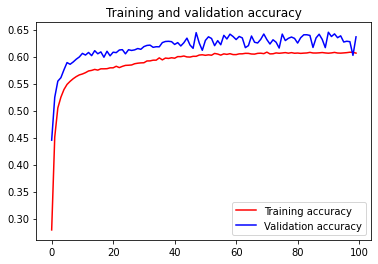

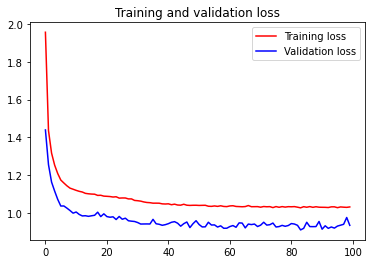

In [ ]:

accuracy = radio_train.history['accuracy']
val_accuracy = radio_train.history['val_accuracy']
loss = radio_train.history['loss']
val_loss = radio_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = radio_model.predict(X_test)
print(predicted_classes.shape)

(32412, 11)


In [ ]:
predicted_classes1 = np.argmax(np.round(predicted_classes), axis=1)
print(predicted_classes.shape)
print(predicted_classes1[:11])

(32412, 11)
[0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
predicted_classes[:5]

array([[5.9708230e-02, 9.4855115e-02, 8.9070871e-02, 1.8851213e-01,
        1.7732088e-01, 2.0035420e-01, 1.0720052e-01, 8.2978055e-02,
        2.1589912e-08, 1.4074519e-08, 1.1027847e-08],
       [5.9001796e-02, 6.8873115e-02, 7.0782207e-02, 1.7857766e-01,
        1.6588995e-01, 1.3786368e-01, 1.7775346e-01, 1.4125787e-01,
        9.0069690e-08, 7.3353142e-08, 5.1670465e-08],
       [6.9479324e-02, 8.2428947e-02, 7.8907728e-02, 1.9748214e-01,
        1.6628215e-01, 2.3839441e-01, 9.4661482e-02, 7.2363853e-02,
        1.1622531e-10, 6.5933682e-11, 6.1994625e-11],
       [7.2304942e-02, 7.8387544e-02, 8.5206576e-02, 2.0794541e-01,
        1.5408245e-01, 2.5939128e-01, 7.9455756e-02, 6.3226059e-02,
        2.6322499e-12, 1.1406237e-12, 9.0049040e-13],
       [8.7401770e-02, 7.0274003e-02, 1.0702923e-01, 2.3121427e-01,
        1.6753322e-01, 2.1227673e-01, 6.7311920e-02, 5.6958858e-02,
        1.2822125e-11, 5.8292811e-12, 3.7746585e-12]], dtype=float32)

In [ ]:
print(trainy[:40])
print(valy[:40])
print(testy[:11])

[7, 2, 5, 4, 4, 5, 0, 3, 1, 0, 5, 6, 3, 3, 2, 2, 7, 4, 4, 5, 6, 7, 1, 1, 6, 6, 6, 5, 1, 6, 3, 2, 5, 5, 6, 2, 5, 4, 5, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 8, 0, 0, 0, 8, 0, 8, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testy, predicted_classes1)

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

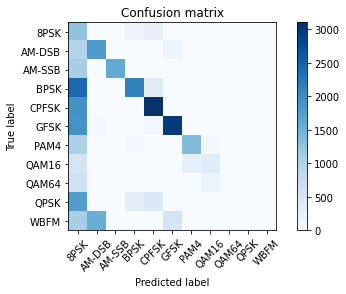

In [ ]:
plot_confusion_matrix(cfm,labels = classes)